### Tract level data compute the area of tracts and geographical distances between tracts

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from libpysal.weights import Queen
from lib import GeoData, load_data
from lib.algorithm import Partition


# Load the shapefile
tractfile_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_shape_files/census_shape_tract/tl_2023_42_tract.shp"

# Define your list of GEOIDs
tract_geoid_list = ["1400000US42003498000", "1400000US42003499300", "1400000US42003499400", "1400000US42003500300", "1400000US42003501000",
                    "1400000US42003503002", "1400000US42003504100", "1400000US42003507000", "1400000US42003508000", "1400000US42003509400",
                    "1400000US42003510000", "1400000US42003512000", "1400000US42003513000", "1400000US42003513800", "1400000US42003514000",
                    "1400000US42003515100", "1400000US42003515200", "1400000US42003515300", "1400000US42003515401", "1400000US42003516100",
                    "1400000US42003516200", "1400000US42003517000", "1400000US42003518001", "1400000US42003519000", "1400000US42003520001",
                    "1400000US42003520002", "1400000US42003521200", "1400000US42003521301", "1400000US42003521302", "1400000US42003521401",
                    "1400000US42003521402", "1400000US42003522000", "1400000US42003550900", "1400000US42003551200", "1400000US42003551300",
                    "1400000US42003551900", "1400000US42003552000", "1400000US42003552100", "1400000US42003552200", "1400000US42003552300",
                    "1400000US42003552400", "1400000US42003561400", "1400000US42003561500", "1400000US42003563900", "1400000US42003564200",
                    "1400000US42003564400", "1400000US42003564700"]

tract_geodata = GeoData(tractfile_path, tract_geoid_list)
tract_geodata.plot_graph()

### Block group level

In [2]:
# Load the shapefile
bgfile_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_shape_files/census_shape_block_group/tl_2023_42_bg.shp"
bg_gdf = gpd.read_file(bgfile_path)
bg_gdf["short_GEOID"] = bg_gdf["GEOID"].str[-7:]  # Create a short GEOID column, which also uniquely identifies each block group
bg_gdf.set_index("short_GEOID", inplace=True)  # Set the short GEOID as the index for easier access

# Define your list of GEOIDs
bg_geoid_list = ["1500000US420034980001", "1500000US420034980002", "1500000US420034993001", "1500000US420034993002", "1500000US420034994001",
              "1500000US420034994002", "1500000US420034994003", "1500000US420035003001", "1500000US420035003002", "1500000US420035003003",
              "1500000US420035003004", "1500000US420035010001", "1500000US420035030021", "1500000US420035030022", "1500000US420035030023",
              "1500000US420035030024", "1500000US420035030025", "1500000US420035041001", "1500000US420035041002", "1500000US420035041003",
              "1500000US420035041004", "1500000US420035041005", "1500000US420035070001", "1500000US420035070002", "1500000US420035080001",
              "1500000US420035080002", "1500000US420035094001", "1500000US420035094002", "1500000US420035094003", "1500000US420035094004",
              "1500000US420035094005", "1500000US420035100001", "1500000US420035100002", "1500000US420035120001", "1500000US420035120002",
              "1500000US420035130001", "1500000US420035130002", "1500000US420035138001", "1500000US420035138002", "1500000US420035140001",
              "1500000US420035140002", "1500000US420035151001", "1500000US420035151002", "1500000US420035151003", "1500000US420035152001",
              "1500000US420035152002", "1500000US420035153001", "1500000US420035153002", "1500000US420035154011", "1500000US420035154012",
              "1500000US420035154013", "1500000US420035161001", "1500000US420035162001", "1500000US420035162002", "1500000US420035170001",
              "1500000US420035170002", "1500000US420035180011", "1500000US420035180012", "1500000US420035180013", "1500000US420035190001",
              "1500000US420035190002", "1500000US420035190003", "1500000US420035200011", "1500000US420035200012", "1500000US420035200021",
              "1500000US420035200022", "1500000US420035200023", "1500000US420035212001", "1500000US420035212002", "1500000US420035212003",
              "1500000US420035213011", "1500000US420035213012", "1500000US420035213013", "1500000US420035213014", "1500000US420035213021",
              "1500000US420035213022", "1500000US420035213023", "1500000US420035213024", "1500000US420035214011", "1500000US420035214012",
              "1500000US420035214021", "1500000US420035214022", "1500000US420035214023", "1500000US420035220001", "1500000US420035220002",
              "1500000US420035220003", "1500000US420035509001", "1500000US420035509002", "1500000US420035512001", "1500000US420035512002",
              "1500000US420035512003", "1500000US420035513001", "1500000US420035513002", "1500000US420035519001", "1500000US420035520001",
              "1500000US420035520002", "1500000US420035520003", "1500000US420035520004", "1500000US420035521001", "1500000US420035521002",
              "1500000US420035522001", "1500000US420035523001", "1500000US420035523002", "1500000US420035523003", "1500000US420035524001",
              "1500000US420035524002", "1500000US420035524003", "1500000US420035614001", "1500000US420035614002", "1500000US420035614003",
              "1500000US420035614004", "1500000US420035615001", "1500000US420035615002", "1500000US420035639001", "1500000US420035639002",
              "1500000US420035639003", "1500000US420035639004", "1500000US420035642001", "1500000US420035642002", "1500000US420035642003",
              "1500000US420035644001", "1500000US420035644002", "1500000US420035644003", "1500000US420035644004", "1500000US420035644005",
              "1500000US420035644006", "1500000US420035644007", "1500000US420035647001", "1500000US420035647002", "1500000US420035647003"]

bg_geodata = GeoData(bgfile_path, bg_geoid_list, level='block_group')
bg_geodata.plot_graph(savepath='./figures/')

### Block level

In [3]:
# Load the shapefile
blockfile_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_shape_files/census_shape_block/tl_2023_42_tabblock20.shp"
# Define tract level list of GEOIDs
tract_geoid_list = ["1400000US42003498000", "1400000US42003499300", "1400000US42003499400", "1400000US42003500300", "1400000US42003501000",
                "1400000US42003503002", "1400000US42003504100", "1400000US42003507000", "1400000US42003508000", "1400000US42003509400",
                "1400000US42003510000", "1400000US42003512000", "1400000US42003513000", "1400000US42003513800", "1400000US42003514000",
                "1400000US42003515100", "1400000US42003515200", "1400000US42003515300", "1400000US42003515401", "1400000US42003516100",
                "1400000US42003516200", "1400000US42003517000", "1400000US42003518001", "1400000US42003519000", "1400000US42003520001",
                "1400000US42003520002", "1400000US42003521200", "1400000US42003521301", "1400000US42003521302", "1400000US42003521401",
                "1400000US42003521402", "1400000US42003522000", "1400000US42003550900", "1400000US42003551200", "1400000US42003551300",
                "1400000US42003551900", "1400000US42003552000", "1400000US42003552100", "1400000US42003552200", "1400000US42003552300",
                "1400000US42003552400", "1400000US42003561400", "1400000US42003561500", "1400000US42003563900", "1400000US42003564200",
                "1400000US42003564400", "1400000US42003564700"]

target_tract_suffix_list = ["1000000US" + tract_geoid[9:] for tract_geoid in tract_geoid_list]
block_geodata = GeoData(blockfile_path, target_tract_suffix_list, level='block')
block_geodata.plot_graph(savepath='./figures/')

### Demand data retrieval

#### Load tract level commuting data from CSV

In [3]:
# Load tract level commuting data from CSV

import pandas as pd
commuting_data_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_target_tract_commuting/2023_target_tract_commuting.csv"
commuting_meta_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_target_tract_commuting/ACSST5Y2023.S0801-Column-Metadata.csv"
commuting_data = load_data(commuting_meta_path, commuting_data_path)
selected_columns = ['Geography', 'Geographic Area Name', 'Estimate Total Workers 16 years and over', 'Estimate Total Workers 16 years and over MEANS OF TRANSPORTATION TO WORK Car, truck, or van Carpooled', \
                    'Estimate Total Workers 16 years and over MEANS OF TRANSPORTATION TO WORK Public transportation (excluding taxicab)', \
                    'Estimate Total Workers 16 years and over MEANS OF TRANSPORTATION TO WORK Taxicab, motorcycle, or other means']
commuting_data = commuting_data[selected_columns]
new_column_names = ['GEOID', 'tract_name', 'total_workers', 'car_truck_van_carpool%', 'public_transportation%', 'taxicab_motorcycle_other%']
commuting_data.columns = new_column_names
commuting_data['short_tract_GEOID'] = commuting_data['GEOID'].str[-6:]  # Create a short GEOID column, which also uniquely identifies each block group
# Add new columns for the absolute numbers of workers
commuting_data['car_truck_van_carpool'] = round(commuting_data['total_workers'] * commuting_data['car_truck_van_carpool%'] / 100)
commuting_data['public_transportation'] = round(commuting_data['total_workers'] * commuting_data['public_transportation%'] / 100)
commuting_data['taxicab_motorcycle_other'] = round(commuting_data['total_workers'] * commuting_data['taxicab_motorcycle_other%'] / 100)

commuting_data.head()

,GEOID,tract_name,total_workers,car_truck_van_carpool%,public_transportation%,taxicab_motorcycle_other%,short_tract_GEOID,car_truck_van_carpool,public_transportation,taxicab_motorcycle_other
0,1400000US42003498000,Census Tract 4980; Allegheny County; Pennsylvania,1116,4.4,2.2,0.0,498000,49.0,25.0,0.0
1,1400000US42003499300,Census Tract 4993; Allegheny County; Pennsylvania,650,9.4,4.3,1.7,499300,61.0,28.0,11.0
2,1400000US42003499400,Census Tract 4994; Allegheny County; Pennsylvania,1419,13.6,12.5,6.3,499400,193.0,177.0,89.0
3,1400000US42003500300,Census Tract 5003; Allegheny County; Pennsylvania,1751,8.2,0.7,0.0,500300,144.0,12.0,0.0
4,1400000US42003501000,Census Tract 5010; Allegheny County; Pennsylvania,745,21.3,2.4,1.9,501000,159.0,18.0,14.0


#### Load block group level population data from CSV and calculate the block group population proportion within its tract

In [4]:
# Load block group level population data from CSV
block_group_data_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_target_blockgroup_population/2023_target_blockgroup_population.csv"
block_group_meta_path = "/Users/miaoyidi/Library/Mobile Documents/com~apple~CloudDocs/Desktop/partition/hct_case/2023_target_blockgroup_population/ACSDT5Y2023.B02001-Column-Metadata.csv"
block_group_pop_data = load_data(block_group_meta_path, block_group_data_path)
selected_columns = ['Geography', 'Geographic Area Name', 'Estimate Total:']
block_group_pop_data = block_group_pop_data[selected_columns]
new_column_names = ['GEOID', 'block_group_name', 'total_population']
block_group_pop_data.columns = new_column_names

# Add the new column as the short tract id, which can be obtained from the -7 to -2 characters of the block group id
block_group_pop_data['short_tract_GEOID'] = block_group_pop_data['GEOID'].str[-7:-1]
tract_population = (
    block_group_pop_data
    .groupby('short_tract_GEOID', as_index=False)['total_population']
    .sum()
    .rename(columns={'total_population': 'tract_population'})
)

block_group_pop_data = block_group_pop_data.merge(tract_population, on='short_tract_GEOID', how='left')
# Add a new column for the population percentage
block_group_pop_data['population%'] = block_group_pop_data['total_population'] / block_group_pop_data['tract_population'] * 100
block_group_pop_data.head()


,GEOID,block_group_name,total_population,short_tract_GEOID,tract_population,population%
0,1500000US420034980001,Block Group 1; Census Tract 4980; Allegheny Co...,1204,498000,2302,52.302346
1,1500000US420034980002,Block Group 2; Census Tract 4980; Allegheny Co...,1098,498000,2302,47.697654
2,1500000US420034993001,Block Group 1; Census Tract 4993; Allegheny Co...,558,499300,1542,36.186770
3,1500000US420034993002,Block Group 2; Census Tract 4993; Allegheny Co...,984,499300,1542,63.813230
4,1500000US420034994001,Block Group 1; Census Tract 4994; Allegheny Co...,758,499400,2858,26.522043


#### Derive the number of demands on each block group according to the population proportion

In [5]:
tract_bg_data = pd.merge(commuting_data, block_group_pop_data, on='short_tract_GEOID', how='left')
selected_columns = ["GEOID_y", "block_group_name", "total_population", "tract_population", "population%", "total_workers", "car_truck_van_carpool", "public_transportation", "taxicab_motorcycle_other"]
tract_bg_data = tract_bg_data[selected_columns]
tract_bg_data.rename(columns={"GEOID_y": "bg_GEOID"}, inplace=True)
tract_bg_data.rename(columns={"total_workers": "tract_total_workers"}, inplace=True)
tract_bg_data.rename(columns={"car_truck_van_carpool": "tract_car_truck_van_carpool"}, inplace=True)
tract_bg_data.rename(columns={"public_transportation": "tract_public_transportation"}, inplace=True)
tract_bg_data.rename(columns={"taxicab_motorcycle_other": "tract_taxicab_motorcycle_other"}, inplace=True)
# Add a new column for the total number of car, truck, or van carpooled workers, public transportation workers, and taxicab, motorcycle, or other means workers
tract_bg_data['total_commuting'] = round((tract_bg_data['tract_car_truck_van_carpool'] + tract_bg_data['tract_public_transportation'] + tract_bg_data['tract_taxicab_motorcycle_other']) * tract_bg_data['population%'] / 100)
# Add a new column for the commuting percentage
tract_bg_data['commuting%'] = tract_bg_data['total_commuting'] / tract_bg_data['tract_total_workers'] * 100

tract_bg_data.head()

,bg_GEOID,block_group_name,total_population,tract_population,population%,tract_total_workers,tract_car_truck_van_carpool,tract_public_transportation,tract_taxicab_motorcycle_other,total_commuting,commuting%
0,1500000US420034980001,Block Group 1; Census Tract 4980; Allegheny Co...,1204,2302,52.302346,1116,49.0,25.0,0.0,39.0,3.494624
1,1500000US420034980002,Block Group 2; Census Tract 4980; Allegheny Co...,1098,2302,47.697654,1116,49.0,25.0,0.0,35.0,3.136201
2,1500000US420034993001,Block Group 1; Census Tract 4993; Allegheny Co...,558,1542,36.186770,650,61.0,28.0,11.0,36.0,5.538462
3,1500000US420034993002,Block Group 2; Census Tract 4993; Allegheny Co...,984,1542,63.813230,650,61.0,28.0,11.0,64.0,9.846154
4,1500000US420034994001,Block Group 1; Census Tract 4994; Allegheny Co...,758,2858,26.522043,1419,193.0,177.0,89.0,122.0,8.597604


#### Create a demand dict at block group level

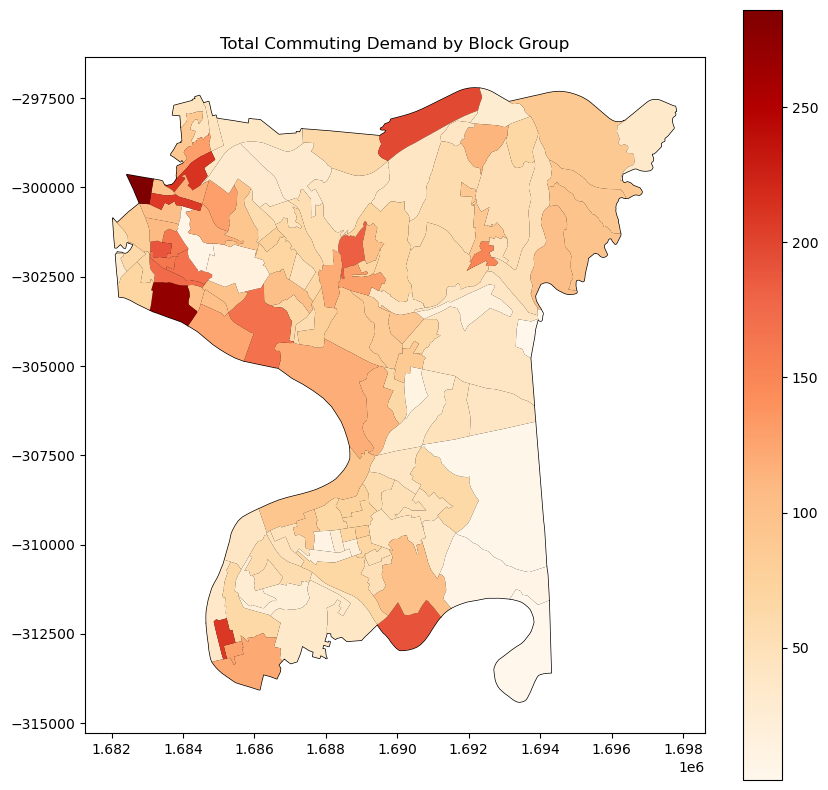

In [6]:
# Create a demand dict at each block group
bg_demand_dict = {}

for index, row in tract_bg_data.iterrows():
    bg_id = row['bg_GEOID'][-7:]
    total_commuting = round(row['total_commuting'])
    car_truck_van_carpool = round(row['tract_car_truck_van_carpool'] * row['population%'] / 100)
    public_transportation = round(row['tract_public_transportation'] * row['population%'] / 100)
    taxicab_motorcycle_other = round(row['tract_taxicab_motorcycle_other'] * row['population%'] / 100)

    bg_demand_dict[bg_id] = {
        'total_commuting': total_commuting,
        'car_truck_van_carpool': car_truck_van_carpool,
        'public_transportation': public_transportation,
        'taxicab_motorcycle_other': taxicab_motorcycle_other
    }

# Create a new column 'total_commuting' by mapping using the index
bg_geodata.gdf['total_commuting'] = bg_geodata.gdf.index.map(lambda x: bg_demand_dict[x]['total_commuting'])

# Create a plot with a base color for the geometries
fig, ax = plt.subplots(figsize=(10, 10))
bg_geodata.gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Overlay the total commuting demand using a colormap
bg_geodata.gdf.plot(column='total_commuting', ax=ax, legend=True, cmap='OrRd')

plt.title("Total Commuting Demand by Block Group")
plt.show()

#### Calculate the demand probability mass on each block group

In [7]:
total_commuting = bg_geodata.gdf['total_commuting'].sum()
print(f"Total commuting demand in the selected block groups: {total_commuting}")
probability_dict = {bg: bg_demand_dict[bg]['total_commuting'] / total_commuting for bg in bg_geodata.short_geoid_list}

Total commuting demand in the selected block groups: 10280


### Hess partition

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-27
ITERATION 0: Centers updated from ['5615001' '4980001' '5639001'] to ['5162001', '5520001', '5094004']
ITERATION 1: Centers updated from ['5162001', '5520001', '5094004'] to ['5162002', '5520001', '5212003']
ITERATION 2: Centers updated from ['5162002', '5520001', '5212003'] to ['5170001', '5520001', '5212003']
ITERATION 3: Centers updated from ['5170001', '5520001', '5212003'] to ['5170001', '5520001', '5212003']
The gap between the lower and upper bound is 1.9910389907447312
ITERATION 0: Centers updated from ['5041002' '5180013' '5509001'] to ['5080001', '5180011', '5520002']
ITERATION 1: Centers updated from ['5080001', '5180011', '5520002'] to ['5080001', '5170001', '5520002']
ITERATION 2: Centers updated from ['5080001', '5170001', '5520002'] to ['5080001', '5170001', '5520002']
The gap between the lower and upper bound is 2.2701061657051795
ITERATION 0: Centers updated from ['5070002' '5521

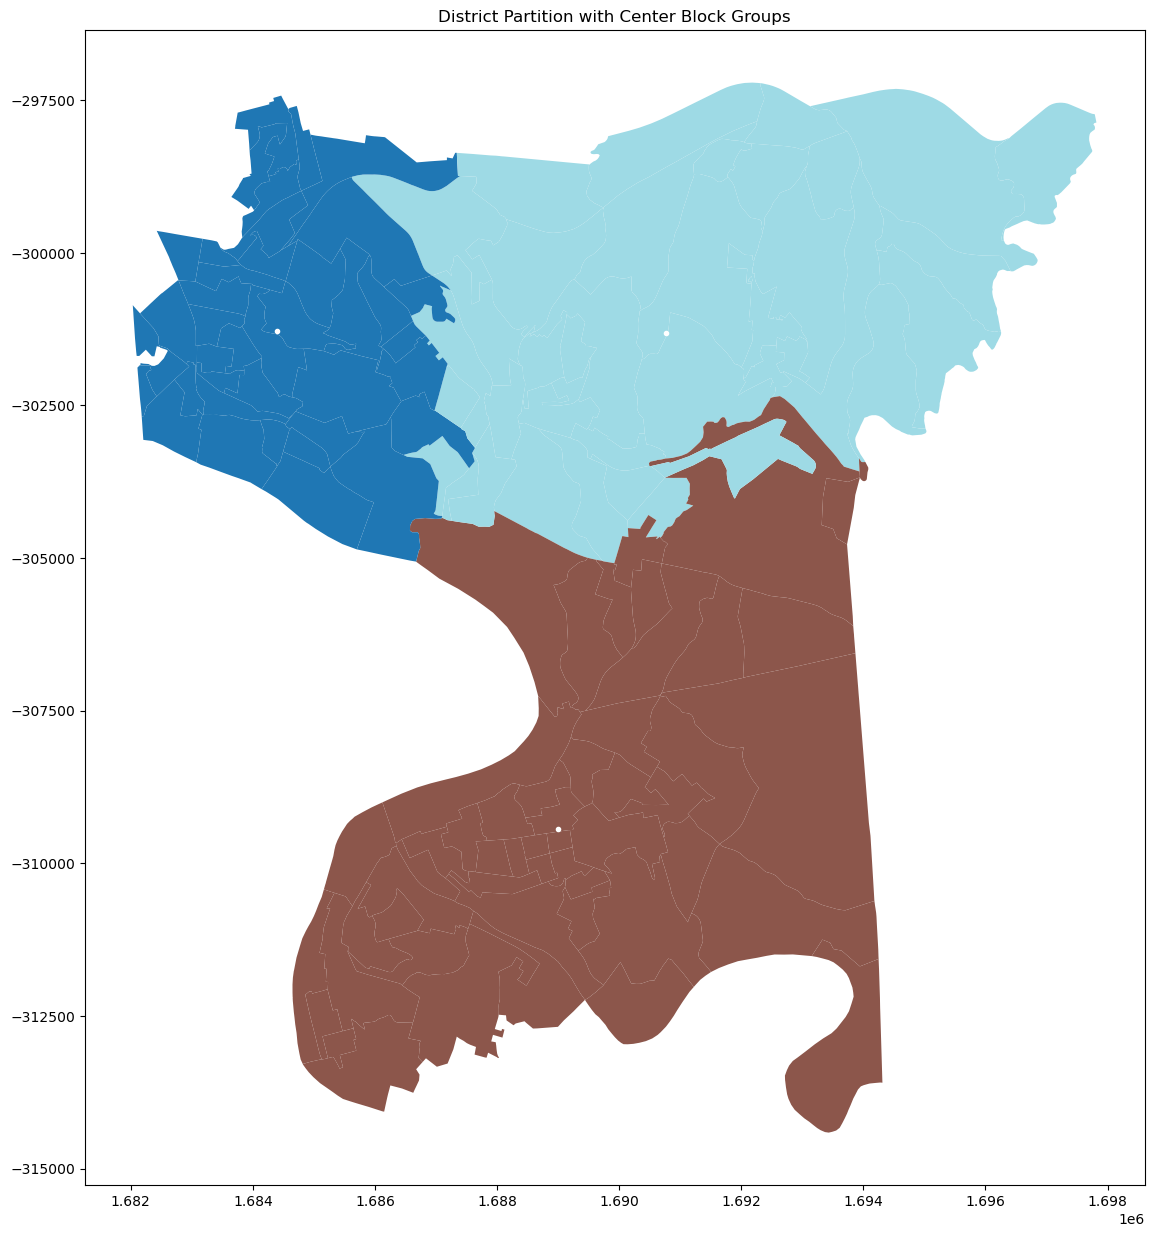

{0: '5170001', 1: '5520003', 2: '5213024'}

In [8]:
partition_problem = Partition(bg_geodata, num_districts=3, prob_dict=probability_dict, epsilon=0.01)
best_block_centers, best_assignment, best_obj_val, worst_district_list, district_costs_list, block_centers_list = partition_problem.random_search(max_iters=10, criterion='lb')
block_centers, best_assignment, best_obj_val = partition_problem.local_search(best_block_centers, best_obj_val)
bg_geodata.plot_partition(best_assignment)

### Legacy optimization code

In [ ]:
import numpy as np
import gurobipy as gp
import math
from gurobipy import GRB
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


def Hess_model(block_centers, num_districts: int, geodata: GeoData):

    assert len(block_centers) == num_districts, f"Got {len(block_centers)} block centers but expected {num_districts} districts"

    assignment_indices = [(bg, center) for bg in geodata.short_geoid_list for center in block_centers]

    Hess_model = gp.Model("Hess_model")
    z = Hess_model.addVars(assignment_indices, vtype=GRB.BINARY, name="z")
    Hess_model.addConstrs((gp.quicksum(z[bg, center] for center in block_centers) == 1 for bg in geodata.short_geoid_list), name="unique_assignment")
    Hess_model.addConstrs((z[center, center] == 1 for center in block_centers), name="center_selection")
    Hess_model.setObjective(gp.quicksum(z[bg, center] * geodata.get_dist(bg, center) for bg in geodata.short_geoid_list for center in block_centers), GRB.MINIMIZE)
    Hess_model.setParam('OutputFlag', 0)
    Hess_model.optimize()

    block_assignment = np.array([[z[bg, center].x for center in block_centers] for bg in geodata.short_geoid_list])
    return block_assignment


def recenter(block_centers, block_assignment, num_districts: int, geodata: GeoData):
    '''
    Recenter the block centers based on the block assignment such that the overall
    travel distance from blocks in that district to the center is minimized
    '''
    assert len(block_centers) == num_districts, f"Got {len(block_centers)} block centers but expected {num_districts} districts"
    new_centers = []

    for old_center_idx in range(num_districts):
        
        blocks_in_district = np.where(block_assignment[:, old_center_idx] == 1)[0]
        recenter_model = gp.Model("recenter_model")
        center_x = recenter_model.addVars(blocks_in_district, vtype=GRB.BINARY, name="z")
        recenter_model.addConstr(gp.quicksum(center_x[i] for i in blocks_in_district) == 1)
        recenter_model.setObjective(gp.quicksum(center_x[i] * geodata.get_dist(geodata.short_geoid_list[i], geodata.short_geoid_list[j])
                                                 for i in blocks_in_district for j in blocks_in_district), GRB.MINIMIZE)
        recenter_model.setParam('OutputFlag', 0)
        recenter_model.optimize()

        new_center = blocks_in_district[np.argmax([center_x[i].x for i in blocks_in_district])]
        new_centers.append(new_center)

    return np.array(new_centers)


def SDP(z, num_districts, block_centers, r, epsilon, geodata: GeoData):
    '''
    Solve the SDP for lower bound of the problem
    '''

    obj_dict = {} # Dict to store the objective values for each district center: value
    node_list = geodata.short_geoid_list
    n = len(node_list)

    for district_idx in range(num_districts):

        model = gp.Model("inner_problem_lower_bound")
        # Add variables
        x = model.addVars(node_list, lb=0.0, name="x")
        y = model.addVars(node_list, node_list, lb=0.0, name='y')

        # Set objective: maximize sum of x_i
        model.setObjective(gp.quicksum(x[node_list[i]] * math.sqrt(geodata.get_area(node_list[i])) * z[i, district_idx] for i in range(n)), GRB.MAXIMIZE)

        # Add quadratic constraint: sum of squares of x_i <= 1
        model.addQConstr(gp.quicksum(x[bg] * x[bg] for bg in node_list) <= 1, name="quad_constraint")
        model.addConstrs((gp.quicksum(y[bg1, bg2] for bg2 in node_list) == r[bg1] for bg1 in node_list), name='y_sum')
        for bg2 in node_list:
            model.addQConstr((gp.quicksum(y[bg1, bg2] for bg1 in node_list) >= x[bg2] * x[bg2]), name='y_sumj')

        model.addConstr(gp.quicksum(geodata.get_dist(bg1, bg2) * y[bg1, bg2] for bg1 in node_list for bg2 in node_list) <= epsilon, name='wasserstein')
        # Optimize model
        model.setParam('OutputFlag', 0)
        model.optimize()

        district_prob = np.sum([r[node_list[i]] * z[i, district_idx] for i in range(n)])
        obj_dict[block_centers[district_idx]] = {'bhh': model.objVal, 'district_mass': district_prob}

    return obj_dict


def LP(z, num_districts, block_centers, r, epsilon, geodata: GeoData):
    '''
    Solve the LP for upper bound of the problem
    '''

    obj_dict = {} # Dict to store the objective values for each district center: value
    node_list = geodata.short_geoid_list
    n = len(node_list)

    for district_idx in range(num_districts):

        model = gp.Model("inner_problem_upper_bound")
        # Add variables
        x = model.addVars(node_list, lb=0.0, name="x")
        y = model.addVars(node_list, node_list, lb=0.0, name='y')

        # Set objective: maximize sum of x_i
        model.setObjective(gp.quicksum(x[node_list[i]] * z[i, district_idx] for i in range(n)), GRB.MAXIMIZE)

        # Add quadratic constraint: sum of squares of x_i <= 1
        model.addQConstr(x.sum() == 1, name="total_mass")
        model.addConstrs((gp.quicksum(y[bg1, bg2] for bg2 in node_list) == r[bg1] for bg1 in node_list), name='y_sum')
        for bg2 in node_list:
            model.addQConstr((gp.quicksum(y[bg1, bg2] for bg1 in node_list) == x[bg2]), name='y_sumj')

        model.addConstr(gp.quicksum(geodata.get_dist(bg1, bg2) * y[bg1, bg2] for bg1 in node_list for bg2 in node_list) <= epsilon, name='wasserstein')
        # Optimize model
        model.setParam('OutputFlag', 0)
        model.optimize()

        district_area = np.sum([geodata.get_area(node_list[i]) * z[i, district_idx] for i in range(n)])
        obj_dict[block_centers[district_idx]] = {'bhh': model.objVal, 'district_area': district_area}

    return obj_dict

In [11]:
# Randomized Heuristic per Validi, Buchanan, and Lykhovyd, 2022
max_iters = 10
num_districts = 3


epsilon = 0.0001
num_blocks = len(bg_geodata.gdf)
node_list = bg_geodata.short_geoid_list

worst_district_list = []
district_costs_list = []
block_centers_list = []
best_obj_val_lb = float('inf')
best_obj_val = float('inf')
best_block_centers = None

for _ in range(max_iters):
    block_centers = np.random.choice(bg_geodata.gdf.index, num_districts, replace=False)
    block_assignment = Hess_model(block_centers, num_districts, bg_geodata)
    new_centers = recenter(block_centers, block_assignment, num_districts, bg_geodata)
    new_centers = [node_list[int(center)] for center in new_centers]
    cnt = 0
    print(f"ITERATION {cnt}: Centers updated from {block_centers} to {new_centers}")
    while sorted(block_centers) != sorted(new_centers):
        block_centers = new_centers
        block_assignment = Hess_model(block_centers, num_districts, bg_geodata)
        new_centers = recenter(block_centers, block_assignment, num_districts, bg_geodata)
        new_centers = [node_list[int(center)] for center in new_centers]
        cnt += 1
        print(f"ITERATION {cnt}: Centers updated from {block_centers} to {new_centers}")

    # Calculate the lower bound of the objective value for all districts and the worst district
    obj_dict_lb = SDP(block_assignment, num_districts, block_centers, probability_dict, epsilon, bg_geodata)
    district_lb_costs = [obj_dict_lb[center]['bhh']**2 * obj_dict_lb[center]['district_mass'] for center in block_centers]
    worst_district_lb = max(obj_dict_lb.items(), key=lambda x: x[1]['bhh']**2 * x[1]['district_mass'])
    worst_district_cost_lb = worst_district_lb[1]['bhh']**2 * worst_district_lb[1]['district_mass']

    # Calculate the upper bound of the objective value for all districts and the worst district
    obj_dict_ub = LP(block_assignment, num_districts, block_centers, probability_dict, epsilon, bg_geodata)
    district_ub_costs = [obj_dict_ub[center]['bhh']**2 * obj_dict_ub[center]['district_area'] for center in block_centers]
    worst_district_ub = max(obj_dict_ub.items(), key=lambda x: x[1]['bhh']**2 * x[1]['district_area'])
    worst_district_cost_ub = worst_district_ub[1]['bhh']**2 * worst_district_ub[1]['district_area']

    print(f"The gap between the lower and upper bound is {worst_district_cost_ub - worst_district_cost_lb}")
    
    worst_district_list.append({'lb': (worst_district_lb, worst_district_cost_lb), 'ub': (worst_district_ub, worst_district_cost_ub)})
    district_costs_list.append({'lb': district_lb_costs, 'ub': district_ub_costs})
    block_centers_list.append(block_centers)
    if worst_district_cost_ub < best_obj_val:
        best_obj_val = worst_district_cost_ub
        best_block_centers = block_centers

print(f"Best block centers: {best_block_centers}")
print(f"Best objective value: {best_obj_val}")
best_assignment = Hess_model(best_block_centers, num_districts, bg_geodata)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-27
ITERATION 0: Centers updated from ['5213023' '5151003' '5162001'] to ['5080001', '5041004', '5615002']
ITERATION 1: Centers updated from ['5080001', '5041004', '5615002'] to ['5213024', '5509001', '5180011']
ITERATION 2: Centers updated from ['5213024', '5509001', '5180011'] to ['5213024', '5520001', '5180011']
ITERATION 3: Centers updated from ['5213024', '5520001', '5180011'] to ['5213024', '5520001', '5180011']
The gap between the lower and upper bound is 1.5862909443944018
ITERATION 0: Centers updated from ['5214022' '5642003' '5644001'] to ['5212002', '5520002', '5170002']
ITERATION 1: Centers updated from ['5212002', '5520002', '5170002'] to ['5213023', '5520001', '5170002']
ITERATION 2: Centers updated from ['5213023', '5520001', '5170002'] to ['5213024', '5520001', '5180011']
ITERATION 3: Centers updated from ['5213024', '5520001', '5180011'] to ['5213024', '5520001', '5180011']
The gap b

In [13]:
epsilon = 10
obj_dict_lb = SDP(best_assignment, num_districts, best_block_centers, probability_dict, epsilon, bg_geodata)
obj_dict_ub = LP(best_assignment, num_districts, best_block_centers, probability_dict, epsilon, bg_geodata)
lb_district_costs = [obj_dict_lb[center]['bhh']**2 * obj_dict_lb[center]['district_mass'] for center in best_block_centers]
ub_district_costs = [obj_dict_ub[center]['bhh']**2 * obj_dict_ub[center]['district_area'] for center in best_block_centers]
worst_district_lb = max(lb_district_costs)
worst_district_ub = max(ub_district_costs)
print(f"Best lower bound district cost: {worst_district_lb}")
print(f"Best upper bound district cost: {worst_district_ub}")

Best lower bound district cost: 17.21352248868799
Best upper bound district cost: 61.48545764270355


In [14]:
worst_district_lbs_ls = []
worst_district_ubs_ls = []
epsilon_values = np.arange(0, 5, 0.1)

for epsilon in epsilon_values:

    obj_dict_lb = SDP(best_assignment, num_districts, best_block_centers, probability_dict, epsilon, bg_geodata)
    obj_dict_ub = LP(best_assignment, num_districts, best_block_centers, probability_dict, epsilon, bg_geodata)

    lb_district_costs = [obj_dict_lb[center]['bhh']**2 * obj_dict_lb[center]['district_mass'] for center in best_block_centers]
    ub_district_costs = [obj_dict_ub[center]['bhh']**2 * obj_dict_ub[center]['district_area'] for center in best_block_centers]
    worst_district_lb = max(lb_district_costs)
    worst_district_ub = max(ub_district_costs)
    worst_district_lbs_ls.append(worst_district_lb)
    worst_district_ubs_ls.append(worst_district_ub)
    print(f"Best lower bound district cost: {worst_district_lb}")
    print(f"Best upper bound district cost: {worst_district_ub}")

Best lower bound district cost: 4.801627558460679
Best upper bound district cost: 6.288763600729452
Best lower bound district cost: 6.100465543576632
Best upper bound district cost: 8.309304703719192
Best lower bound district cost: 6.732005532650752
Best upper bound district cost: 10.118871550342526
Best lower bound district cost: 7.24427220911012
Best upper bound district cost: 11.880716689082162
Best lower bound district cost: 7.674797167219676
Best upper bound district cost: 13.523533260568309
Best lower bound district cost: 8.057308525503315
Best upper bound district cost: 15.121323570261602
Best lower bound district cost: 8.4023567638598
Best upper bound district cost: 16.729502077322792
Best lower bound district cost: 8.703301172004945
Best upper bound district cost: 18.36774224487393
Best lower bound district cost: 8.95924052858377
Best upper bound district cost: 19.993459494323535
Best lower bound district cost: 9.19687956441663
Best upper bound district cost: 21.64293512289417

In [15]:
# Calculate the area of each district
district_area_dict = {}
for j in range(len(best_block_centers)):
    district_area = sum(bg_geodata.get_area(bg_geodata.short_geoid_list[i]) for i in range(len(bg_geodata.short_geoid_list)) if best_assignment[i, j] == 1)
    district_area_dict[best_block_centers[j]] = district_area

district_area_dict

{'5170001': 30.61724278347486,
 '5213024': 61.485457642703544,
 '5520001': 55.607350668046465}

In [16]:
district_prob_dict = {}
for j in range(len(best_block_centers)):
    district_prob = sum(probability_dict[bg_geodata.short_geoid_list[i]] for i in range(len(bg_geodata.short_geoid_list)) if best_assignment[i, j] == 1)
    district_prob_dict[best_block_centers[j]] = district_prob

sum(list(district_prob_dict.values()))

0.9999999999999998

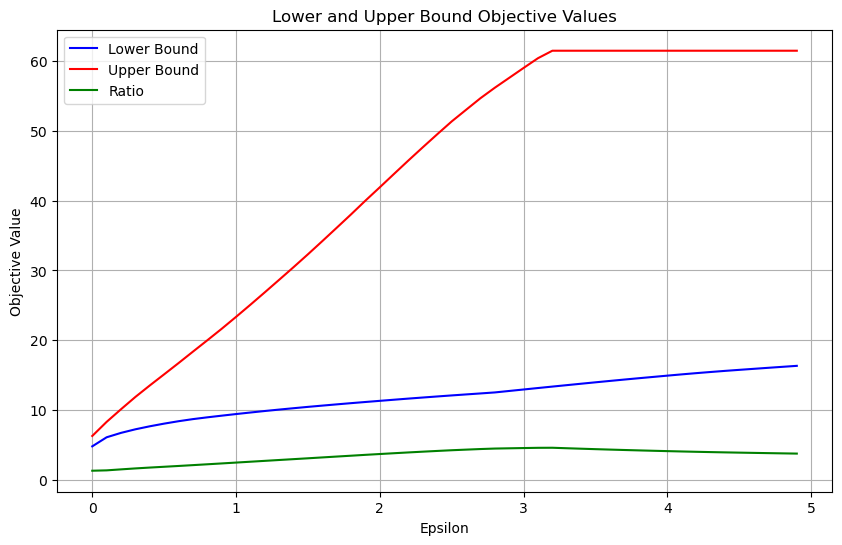

In [17]:
ratios = np.array(worst_district_ubs_ls) / np.array(worst_district_lbs_ls)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, worst_district_lbs_ls, label='Lower Bound', color='blue')
plt.plot(epsilon_values, worst_district_ubs_ls, label='Upper Bound', color='red')
plt.plot(epsilon_values, ratios, label='Ratio', color='green')
plt.xlabel('Epsilon')
plt.ylabel('Objective Value')
plt.title('Lower and Upper Bound Objective Values')
plt.legend()
plt.grid()
plt.show()



In [25]:
# Local searach per Validi, Buchanan, and Lykhovyd, 2022
def local_search(block_centers, best_obj_val, num_districts, geodata: GeoData):
    for center in block_centers:
        for neighbor in geodata.G.neighbors(center):
            if neighbor not in block_centers:
                new_centers = block_centers.copy()
                new_centers.remove(center)
                new_centers.append(neighbor)
                new_assignment = Hess_model(new_centers, num_districts, geodata)
                new_obj_dict = SDP(new_assignment, num_districts, new_centers, probability_dict, epsilon, geodata)
                new_obj_val_dict = {bg: new_obj_dict[bg]['bhh'] * math.sqrt(new_obj_dict[bg]['district_mass']) for bg in new_obj_dict.keys()}
                new_obj_val = max(new_obj_val_dict.values())
                
                if new_obj_val < best_obj_val:
                    print(f"new obj val: {new_obj_val}")
                    block_centers = new_centers
                    best_obj_val = new_obj_val
                    return local_search(block_centers, best_obj_val, num_districts, geodata)
    return block_centers, best_obj_val

best_block_centers, best_obj_val = local_search(best_block_centers, best_obj_val, num_districts, bg_geodata)
best_assignment = Hess_model(best_block_centers, num_districts, bg_geodata)


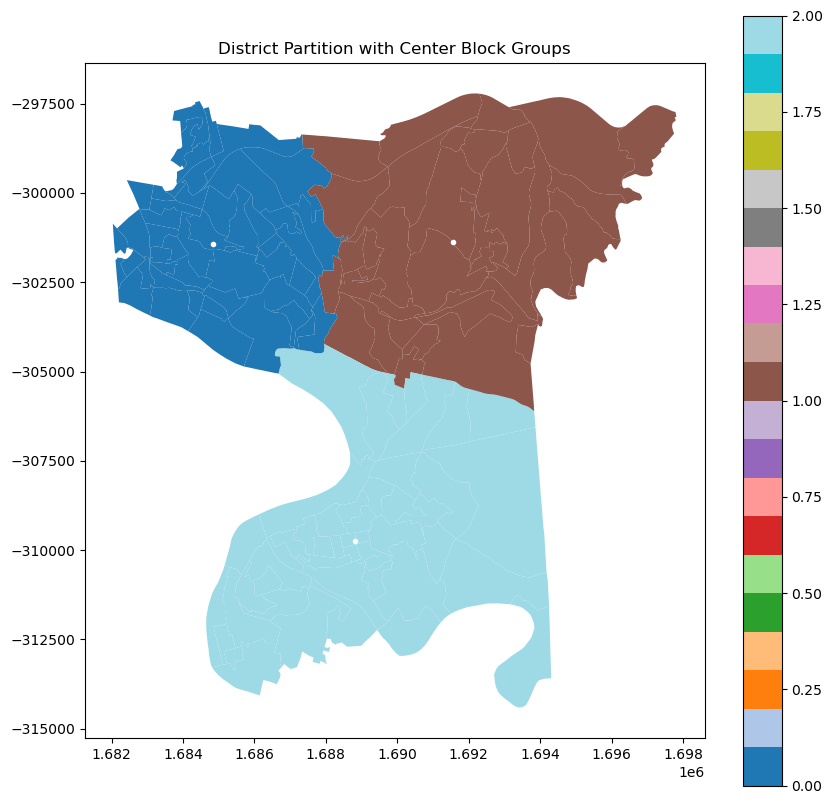

In [21]:
def plot_partition(assignment, gdf):
    """
    Visualize the partition of block groups into districts.
    
    Parameters:
      assignment (np.ndarray): Binary array of shape (n_block_groups, n_centers),
                               where each row has exactly one 1.
      gdf (GeoDataFrame): GeoDataFrame of block groups; order must match assignment rows.
      
    Returns:
      centers (dict): Dictionary mapping each district (center index) to its center block group id.
    """
    # Convert binary assignment to a district label per block group.
    district_labels = np.argmax(assignment, axis=1)
    gdf = gdf.copy()  # avoid modifying the original GeoDataFrame
    gdf['district'] = district_labels

    # Create the plot with a categorical colormap.
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(column='district', cmap='tab20', legend=True, ax=ax)
    
    centers = {}
    # For each district, determine the center block group.
    for district in np.unique(district_labels):
        subset = gdf[gdf['district'] == district]
        # Compute centroids of the block groups in this district.
        centroids = subset.geometry.centroid
        # Compute the average centroid (district centroid)
        avg_x = centroids.x.mean()
        avg_y = centroids.y.mean()
        # Find the block group whose centroid is closest to the district centroid.
        distances = centroids.apply(lambda geom: ((geom.x - avg_x)**2 + (geom.y - avg_y)**2)**0.5)
        center_idx = distances.idxmin()  # center's index (e.g., GEOID)
        centers[district] = center_idx
        
        # # Plot the boundary of the center block group with a thicker line.
        # subset.loc[[center_idx]].boundary.plot(ax=ax, edgecolor='black', linewidth=3)
        # Optionally, add a marker at the center.
        # ax.plot(centroids.loc[center_idx].x, centroids.loc[center_idx].y, marker='o',
        #         color='white', markersize=3)
        ax.plot(avg_x, avg_y, marker='o',
                color='white', markersize=3)
    
    plt.title("District Partition with Center Block Groups")
    plt.show()
    
    return centers

district_centers = plot_partition(best_assignment, bg_geodata.gdf)

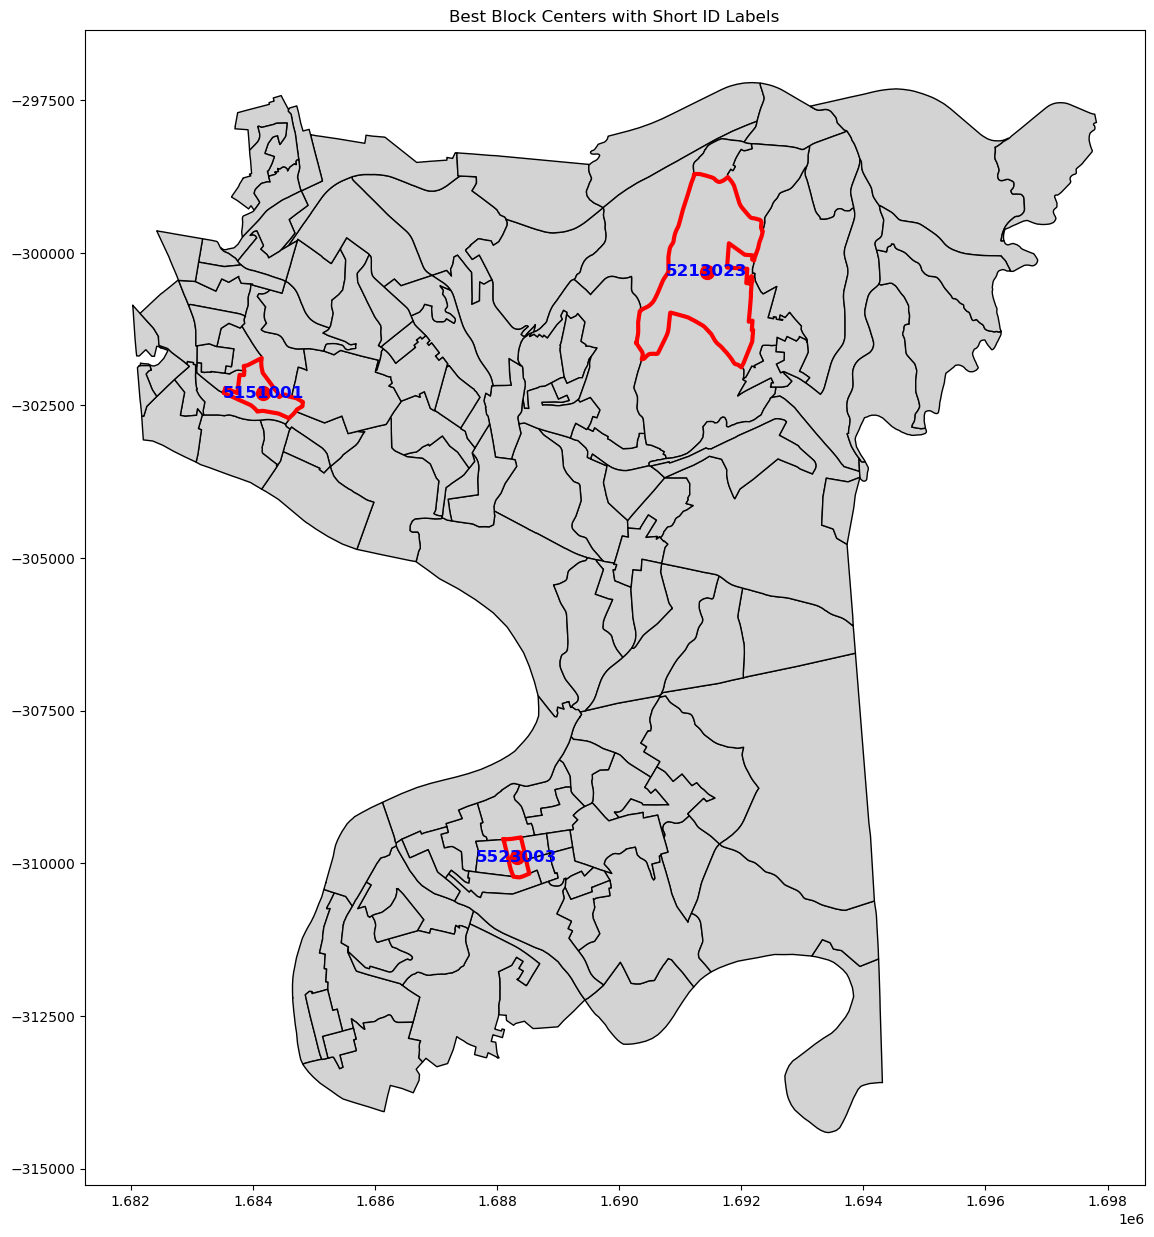

In [22]:
# Show the best block centers on the map with their short id as labels
fig, ax = plt.subplots(figsize=(15, 15))
bg_geodata.gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

for center in best_block_centers:
    # Get the geometry of the center block group based on its index or id.
    center_geom = bg_geodata.gdf.loc[bg_geodata.gdf.index == center].geometry.values[0]
    # Plot the center block group with a thicker red edge.
    ax.plot(*center_geom.exterior.xy, color='red', linewidth=3)
    # Compute the centroid of the block group.
    center_point = center_geom.centroid
    # Plot a marker at the centroid.
    ax.plot(center_point.x, center_point.y, marker='o', color='red', markersize=10)
    # Place the short id label near the centroid.
    # Adjust horizontal (ha) and vertical (va) alignment as needed.
    ax.text(center_point.x, center_point.y, str(center), fontsize=12, color='blue',
            ha='center', va='center', fontweight='bold')

plt.title("Best Block Centers with Short ID Labels")
plt.show()

# HCT routes on block group level

## Fixed-route

In [9]:
from lib.data import RouteData
from lib.evaluate import Evaluate

routedata = RouteData("./hct_routes.json", bg_geodata)
# routedata.visualize_routes_and_nodes()
assignment, center_list = routedata.build_assignment_matrix(visualize=False)
evaluation = Evaluate(routedata, bg_geodata, epsilon=3)

#### Worst node

In [10]:
results_dict = evaluation.find_worst_walk_node()

print(f"The worst node is {results_dict['node']} belonging to route {results_dict['route']}")
print(f"The worst node's distance is {results_dict['walk_distance']} with walk time {results_dict['walk_distance'] / 1.4 / 60} mins")
print(f"The worst node's wait time is {results_dict['wait_time'] / 60} mins")
print(f"The worst node's transit time is {results_dict['transit_time'] / 60} mins")


The worst node is 5614002 belonging to route East Pittsburgh
The worst node's distance is 4618.328087245677 with walk time 54.98009627673425 mins
The worst node's wait time is 63.233333333333334 mins
The worst node's transit time is 97.5 mins


#### Empirical distribution

In [11]:

results_dict = evaluation.evaluate(assignment, center_list, probability_dict, mode='fixed')

travel_distance = results_dict['route_lengths']
travel_time = results_dict['travel_times']
route_distance_per_hour = {}

for route in travel_distance:
    route_distance_per_hour[route] = travel_distance[route] / 1e3 / (travel_time[route] / 3600)
    print(f"Route {route}: {travel_distance[route] / 1e3} km")
    print(f"Route {route}: {travel_time[route] / 3600} hrs")
    print(f"Route {route}: {travel_distance[route] / 1e3 / travel_time[route] * 3600} km/h")

expected_walk_time = results_dict['expected_walk_time']
expected_wait_time = results_dict['expected_wait_time']
expected_transit_time = results_dict['expected_transit_time']

print(f"Total distance per hour: {sum(route_distance_per_hour.values())} km/h")
print(f"Total expected walk time: {expected_walk_time / 60} mins")
print(f"Total expected wait time: {expected_wait_time / 60} mins")
print(f"Total expected transit time: {expected_transit_time / 60} mins")

Route East Pittsburgh: 40.850690901330275 km
Route East Pittsburgh: 2.1077777777777778 hrs
Route East Pittsburgh: 19.380928735475617 km/h
Route Monroeville: 43.85468860898129 km
Route Monroeville: 2.4047222222222224 hrs
Route Monroeville: 18.236904122944743 km/h
Route McKeesport: 57.92455392743643 km
Route McKeesport: 3.1286111111111112 hrs
Route McKeesport: 18.514462766471734 km/h
Total distance per hour: 56.132295624892095 km/h
Total expected walk time: 14.601752047985547 mins
Total expected wait time: 70.17422022739348 mins
Total expected transit time: 73.87713097078247 mins


#### Worst-case distribution

In [12]:
worst_case_distribution, transport_plan = evaluation.get_fixed_route_worst_distribution(probability_dict)
results_dict = evaluation.evaluate(assignment, center_list, worst_case_distribution, mode='fixed')

travel_distance = results_dict['route_lengths']
travel_time = results_dict['travel_times']
route_distance_per_hour = {}

for route in travel_distance:
    route_distance_per_hour[route] = travel_distance[route] / 1e3 / (travel_time[route] / 3600)
    print(f"Route {route}: {travel_distance[route] / 1e3} km")
    print(f"Route {route}: {travel_time[route] / 3600} hrs")
    print(f"Route {route}: {travel_distance[route] / 1e3 / travel_time[route] * 3600} km/h")

expected_walk_time = results_dict['expected_walk_time']
expected_wait_time = results_dict['expected_wait_time']
expected_transit_time = results_dict['expected_transit_time']

print(f"Total distance per hour: {sum(route_distance_per_hour.values())} km/h")
print(f"Total expected walk time: {expected_walk_time / 60} mins")
print(f"Total expected wait time: {expected_wait_time / 60} mins")
print(f"Total expected transit time: {expected_transit_time / 60} mins")

Route East Pittsburgh: 40.850690901330275 km
Route East Pittsburgh: 2.1077777777777778 hrs
Route East Pittsburgh: 19.380928735475617 km/h
Route Monroeville: 43.85468860898129 km
Route Monroeville: 2.4047222222222224 hrs
Route Monroeville: 18.236904122944743 km/h
Route McKeesport: 57.92455392743643 km
Route McKeesport: 3.1286111111111112 hrs
Route McKeesport: 18.514462766471734 km/h
Total distance per hour: 56.132295624892095 km/h
Total expected walk time: 40.43508032028173 mins
Total expected wait time: 70.2860027743905 mins
Total expected transit time: 76.47478411512994 mins


## Doorstep pickup

In [13]:
import math

node_list = bg_geodata.short_geoid_list
num_of_demands = 5
n = len(node_list)
district_prob_sqrt = np.sum([math.sqrt(probability_dict[node_list[i]]) * math.sqrt(bg_geodata.get_area(node_list[i])) * assignment[i, 0] for i in range(n)])
beta = 2287 / (math.sqrt(214) * 210)
bhh_distance = beta * math.sqrt(num_of_demands) * district_prob_sqrt
print(f"The BHH distance is {bhh_distance}")

The BHH distance is 7.483096097836701


#### Original partition

In [14]:
total_commuting / 96

107.08333333333333

In [17]:
assignment, center_list = routedata.build_assignment_matrix(visualize=False)
results_dict = evaluation.evaluate_tsp_mode(probability_dict, assignment, center_list, unit_wait_cost=5.04, overall_arrival_rate=total_commuting / 96)

for center in results_dict:
    interval = results_dict[center]['dispatch_interval']
    mean_wait_time_per_interval = results_dict[center]['mean_wait_time_per_interval']
    mean_transit_distance_per_interval = results_dict[center]['mean_transit_distance_per_interval']
    amt_wait_time = results_dict[center]['amt_wait_time']
    amt_transit_distance = results_dict[center]['amt_transit_distance']
    print(f"center {center}: dispatch interval: {interval}")
    print(f"Center {center}: mean wait time per interval: {mean_wait_time_per_interval} hrs")
    print(f"Center {center}: mean transit distance per interval: {mean_transit_distance_per_interval} km")
    print(f"Center {center}: amt wait time: {amt_wait_time} hrs")
    print(f"Center {center}: amt transit distance: {amt_transit_distance} km/hr")

center 5180013: dispatch interval: 0.21615523452474633
Center 5180013: mean wait time per interval: 2.501630858840998 hrs
Center 5180013: mean transit distance per interval: 25.216439057117267 km
Center 5180013: amt wait time: 11.573306861345525 hrs
Center 5180013: amt transit distance: 116.65893316236293 km/hr
center 5520001: dispatch interval: 0.2521618505274217
Center 5520001: mean wait time per interval: 2.2768974298993734 hrs
Center 5520001: mean transit distance per interval: 22.951126093385685 km
Center 5520001: amt wait time: 9.029507933642678 hrs
Center 5520001: amt transit distance: 91.01743997111821 km/hr
center 5220003: dispatch interval: 0.2315588412622025
Center 5220003: mean wait time per interval: 1.936533540025494 hrs
Center 5220003: mean transit distance per interval: 19.520258083456984 km
Center 5220003: amt wait time: 8.36303001634339 hrs
Center 5220003: amt transit distance: 84.2993425647414 km/hr


#### Optimized partition

In [16]:
results_dict = evaluation.evaluate_tsp_mode(probability_dict, best_assignment, best_block_centers, unit_wait_cost=5.04, overall_arrival_rate=total_commuting / 48)

for center in results_dict:
    mean_wait_time_per_interval = results_dict[center]['mean_wait_time_per_interval']
    mean_transit_distance_per_interval = results_dict[center]['mean_transit_distance_per_interval']
    amt_wait_time = results_dict[center]['amt_wait_time']
    amt_transit_distance = results_dict[center]['amt_transit_distance']
    print(f"Center {center}: mean wait time per interval: {mean_wait_time_per_interval} hrs")
    print(f"Center {center}: mean transit distance per interval: {mean_transit_distance_per_interval / 1e3} km")
    print(f"Center {center}: amt wait time: {amt_wait_time} hrs")
    print(f"Center {center}: amt transit distance: {amt_transit_distance / 1e3} km")

Center 5170001: mean wait time per interval: 2.8664796123031313 hrs
Center 5170001: mean transit distance per interval: 0.028894114492015555 km
Center 5170001: amt wait time: 14.749576955351214 hrs
Center 5170001: amt transit distance: 0.14867573570994017 km
Center 5520001: mean wait time per interval: 3.0627439575191624 hrs
Center 5520001: mean transit distance per interval: 0.030872459091793165 km
Center 5520001: amt wait time: 13.896351136256266 hrs
Center 5520001: amt transit distance: 0.1400752194534632 km
Center 5212003: mean wait time per interval: 1.9044279819941339 hrs
Center 5212003: mean transit distance per interval: 0.019196634058500864 km
Center 5212003: amt wait time: 12.980750185079922 hrs
Center 5212003: amt transit distance: 0.1308459618656056 km


## Independent Simulation

### Simple uniform simulation

#### For empirical distribution

In [22]:
prob_mass_solution, transport_plan_solution = evaluation._get_fixed_route_worst_distribution(probability_dict)
wait_times, transit_times = evaluation.simulate_wait_and_transit_fixed_route(probability_dict, n_sims=100000)
avg_wait_time = np.mean(wait_times)
avg_transit_time = np.mean(transit_times)
print(f"Average wait time: {avg_wait_time / 60} minutes")
print(f"Average transit time: {avg_transit_time / 60} minutes")

Average wait time: 73.0059592852334 minutes
Average transit time: 74.77795783333333 minutes


#### For worst-case distribution

In [23]:
prob_mass_solution, transport_plan_solution = evaluation._get_fixed_route_worst_distribution(probability_dict)
wait_times, transit_times = evaluation.simulate_wait_and_transit_fixed_route(prob_mass_solution, n_sims=100000)
avg_wait_time = np.mean(wait_times)
avg_transit_time = np.mean(transit_times)
print(f"Average wait time: {avg_wait_time / 60} minutes")
print(f"Average transit time: {avg_transit_time / 60} minutes")


Average wait time: 73.21471447385898 minutes
Average transit time: 77.64225983333334 minutes


### Simpy simulation

#### For empirical distribution

In [24]:
wait_times, transit_times = evaluation.simulate_wait_and_transit_fixed_route_simpy(probability_dict, sim_time=43200)
expected_wait_time = np.sum([wait_times[rt][0] * wait_times[rt][1] for rt in wait_times])
expected_transit_time = np.sum([transit_times[rt][0] * transit_times[rt][1] for rt in transit_times])
print(f"Expected wait time: {expected_wait_time/ 60} minutes")
print(f"Expected transit time: {expected_transit_time / 60} minutes")

Expected wait time: 69.65122907872222 minutes
Expected transit time: 74.09090005786798 minutes


#### For worst-case distribution

In [25]:
prob_mass_solution, transport_plan_solution = evaluation._get_fixed_route_worst_distribution(probability_dict)
wait_times, transit_times = evaluation.simulate_wait_and_transit_fixed_route_simpy(prob_mass_solution, sim_time=43200)
expected_wait_time = np.sum([wait_times[rt][0] * wait_times[rt][1] for rt in wait_times])
expected_transit_time = np.sum([transit_times[rt][0] * transit_times[rt][1] for rt in transit_times])
print(f"Expected wait time: {expected_wait_time/ 60} minutes")
print(f"Expected transit time: {expected_transit_time / 60} minutes")

Expected wait time: 70.06431502615146 minutes
Expected transit time: 76.72741885652742 minutes


## Something else

### Visualize the optimal transport plan from worst-case distribution

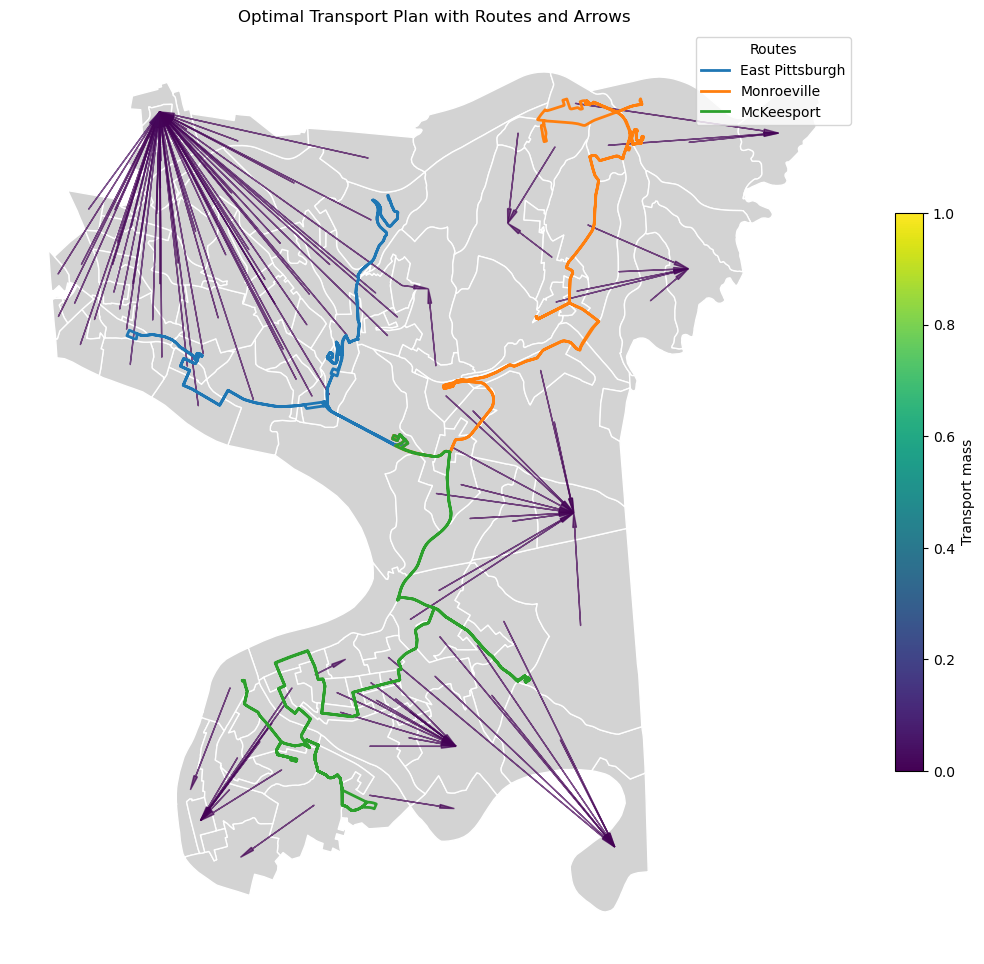

In [27]:
import matplotlib.pyplot as plt
from matplotlib import colors
from shapely.geometry import LineString, Point
import polyline

def plot_transport_map_with_routes_and_arrows(transport_plan, bg_geodata, routedata, vmin=None, vmax=None, cmap_name='viridis'):
    """
    Plot the optimal transport plan as arrows between centroids, colored by transported mass,
    and overlay fixed routes.

    Parameters
    ----------
    transport_plan : dict
        Mapping (node_i, node_j) -> transported mass.
    bg_geodata : GeoData
        GeoData instance with gdf and pos attributes.
    routedata : RouteData
        RouteData instance with routes_info attribute.
    vmin, vmax : float, optional
        Color‐scale bounds. If None, taken from min/max mass.
    cmap_name : str
        Matplotlib colormap name.
    """
    fig, ax = plt.subplots(figsize=(12, 12))
    # Base region
    bg_geodata.gdf.plot(ax=ax, facecolor='lightgray', edgecolor='white')

    # Overlay routes
    for route in routedata.routes_info:
        name = route.get("Description", f"Route {route.get('RouteID')}")
        encoded = route.get("EncodedPolyline")
        if encoded:
            coords = polyline.decode(encoded)
            line = LineString([(lng, lat) for lat, lng in coords])
            proj = routedata.project_geometry(line)
            ax.plot(*proj.xy, linewidth=2, label=name)

    # Prepare transport flows as arrows
    lines, weights = [], []
    for (i, j), mass in transport_plan.items():
        if mass > 0:
            x1, y1 = bg_geodata.pos[i]
            x2, y2 = bg_geodata.pos[j]
            lines.append(((x1, y1), (x2, y2)))
            weights.append(mass)

    if not weights:
        raise ValueError("No positive transport flows to plot.")

    # Color normalization
    if vmin is None: vmin = min(weights)
    if vmax is None: vmax = max(weights)
    norm = colors.Normalize(vmin=0, vmax=1)
    cmap = plt.get_cmap(cmap_name)

    # Plot arrows
    for ((x1, y1), (x2, y2)), w in zip(lines, weights):
        color = cmap(norm(w))
        dx, dy = x2 - x1, y2 - y1
        ax.arrow(
            x1, y1, dx, dy,
            length_includes_head=True,
            head_width=75, head_length=300,
            color=color, alpha=0.7,
            linewidth=1 + 3 * (w - vmin) / (vmax - vmin)
        )

    # Colorbar for transport mass
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
    # cbar.set_ticks([0.0, 0.25, 0.5, 0.75, 1.0])
    # cbar.set_ticklabels(['0.0', '0.25', '0.50', '0.75', '1.0'])
    cbar.set_label('Transport mass')

    # Legend for routes
    ax.legend(title="Routes", loc='upper right')

    ax.set_title("Optimal Transport Plan with Routes and Arrows")
    ax.set_axis_off()
    plt.show()

# Example call (assuming variables exist):
plot_transport_map_with_routes_and_arrows(transport_plan_solution, bg_geodata, routedata, vmin=0, vmax=1000, cmap_name='viridis')



### Travel time sanity check

In [30]:
route_lengths = {}
route_projected_stops = {}
routes_info = routedata.routes_info

# Loop over each route in the routes_info.
for route in routes_info:
    route_name = route.get("Description", "Unnamed Route")
    encoded_poly = route.get("EncodedPolyline")
    stops = route.get("Stops", [])
    
    # Calculate route length if the polyline exists.
    if encoded_poly:
        try:
            coords = polyline.decode(encoded_poly)
            coords_swapped = [(lng, lat) for lat, lng in coords]
            route_line = LineString(coords_swapped)
            projected_line = routedata.project_geometry(route_line)
            length = projected_line.length  # Length in meters (since EPSG:2163 uses meters)
            route_lengths[route_name] = length
        except Exception as e:
            print(f"Error decoding polyline for route '{route_name}': {e}")
    
    # Process the stops: project each stop to EPSG:2163.
    projected_stops = []
    for stop in stops:
        lat = stop.get("Latitude")
        lng = stop.get("Longitude")
        pt = Point(lng, lat)
        projected_pt = routedata.project_geometry(pt)
        projected_stops.append(projected_pt)
    route_projected_stops[route_name] = projected_stops

# Print out the lengths of each route.
print("Route Lengths (meters):")
for route_name, length in route_lengths.items():
    print(f"  {route_name}: {length:.2f} m")



def calculate_total_travel_times(routes_info):
    """
    Calculate the total travel time for each route by summing the "SecondsToNextStop" 
    values of its stops.

    Parameters:
      routes_info (list): List of route dictionaries. Each route dictionary should have:
                          - "Description": a string describing the route.
                          - "Stops": a list of stop dictionaries, where each stop
                                     dictionary contains a "SecondsToNextStop" key.
    
    Returns:
      dict: A dictionary mapping route descriptions (or route IDs) to the total travel time in seconds.
    """
    travel_times = {}
    for route in routes_info:
        # Use the route's description if available; otherwise, fall back on RouteID.
        route_name = route.get("Description", f"Route {route.get('RouteID', 'Unknown')}")
        stops = route.get("Stops", [])
        # Sum the travel times for all stops in the route.
        total_time = sum(stop.get("SecondsToNextStop", 0) for stop in stops)
        travel_times[route_name] = total_time
    return travel_times

# For demonstration, here's how you would call the function:
travel_times = calculate_total_travel_times(routes_info)

# Print the travel times per route.
for route, time_sec in travel_times.items():
    print(f"Total travel time for '{route}': {time_sec} seconds")

for route_name, travel_time in travel_times.items():
    print(f"Route: {route_name}, Total Travel Time: {travel_time} seconds")
    print(f"Speed (assuming constant speed): {route_lengths[route_name] / travel_time} m/s")


Route Lengths (meters):
  East Pittsburgh: 40850.69 m
  Monroeville: 43854.69 m
  McKeesport: 57924.55 m
Total travel time for 'East Pittsburgh': 7588 seconds
Total travel time for 'Monroeville': 8657 seconds
Total travel time for 'McKeesport': 11263 seconds
Route: East Pittsburgh, Total Travel Time: 7588 seconds
Speed (assuming constant speed): 5.383591315409894 m/s
Route: Monroeville, Total Travel Time: 8657 seconds
Speed (assuming constant speed): 5.065806700817984 m/s
Route: McKeesport, Total Travel Time: 11263 seconds
Speed (assuming constant speed): 5.142906324019926 m/s


### Walk time

In [ ]:
# Compute the weighted sum of distances (from block group centers to the nearest stops) for each route (weighted by block group probability mass)
# but only over block groups that are assigned to the route via district_assignment.
results = {}  # results[route_name] = weighted sum (in meters)

for route_name, stops in route_projected_stops.items():
    weighted_sum = 0.0
    # Loop over all block groups.
    for idx, row in gdf.iterrows():
        # Only consider block groups assigned to the current route.
        if district_assignment.get(idx) == route_name:
            centroid = row.geometry.centroid
            # Compute the minimum distance from the block group centroid to any stop on the current route.
            if stops:
                distances = [centroid.distance(stop) for stop in stops]
                min_distance = min(distances)
            else:
                print(f"No stops found for route '{route_name}'")
                min_distance = 0.0
            
            # Get the probability mass (weight) for the block group.
            # Assumes that the probability_dict uses the block group index as key.
            weight = probability_dict.get(idx, 0)
            weighted_sum += min_distance * weight
    results[route_name] = weighted_sum

# Print out the weighted sum of distances (in meters) for each route.
print("\nWeighted Sum of Distances (in meters) by Route:")
for route_name, w_sum in results.items():
    print(f"Route '{route_name}': {w_sum:.2f} m")

# Calculate the probability mass for each district
district_prob_dict = {}
for district, group in gdf.groupby('district'):
    district_prob = sum(probability_dict[i] for i in group.index)
    district_prob_dict[district] = district_prob

print(f"Total expected walk distance: {sum([results[route] * district_prob_dict[route] for route in results])}")

# If walking speed is 1.4 m/s, convert the expected walk distance to time in seconds
walking_speed = 1.4  # m/s
expected_walk_time = sum([results[route] * district_prob_dict[route] for route in results]) / walking_speed
print(f"Expected walk time: {expected_walk_time} seconds")


# max walk distance and time
max_walk_distance = 0.0
max_walk_info = {}  # to store details: block group index, assigned route, and distance

for idx, row in gdf.iterrows():
    assigned_route = district_assignment.get(idx)
    if assigned_route is not None:
        stops = route_projected_stops.get(assigned_route, [])
        if stops:
            centroid = row.geometry.centroid
            distances = [centroid.distance(stop) for stop in stops]
            min_distance = min(distances)
            # Update maximal distance if this block group's value is higher.
            if min_distance > max_walk_distance:
                max_walk_distance = min_distance
                max_walk_info = {
                    "block_group_index": idx,
                    "assigned_route": assigned_route,
                    "min_distance": min_distance
                }
        else:
            print(f"No stops found for route '{assigned_route}' assigned to block group {idx}")
    else:
        # If a block group is not assigned to any route, skip it.
        continue

print("\nMaximal Walk Distance Across All Block Groups:")
print(f"The maximal walk distance is {max_walk_distance:.5f} m.")
print(f"The maximal walk time: {max_walk_distance / walking_speed:.5f} seconds")
if max_walk_info:
    print(f"Block group {max_walk_info['block_group_index']} (assigned to route '{max_walk_info['assigned_route']}') "
          f"has the maximal walk distance of {max_walk_distance:.5f} m.")


Weighted Sum of Distances (in meters) by Route:
Route 'East Pittsburgh': 785.15 m
Route 'Monroeville': 160.48 m
Route 'McKeesport': 280.91 m
Total expected walk distance: 541.094593771724
Expected walk time: 386.49613840837435 seconds

Maximal Walk Distance Across All Block Groups:
The maximal walk distance is 4618.32809 m.
The maximal walk time: 3298.80578 seconds
Block group 5614002 (assigned to route 'East Pittsburgh') has the maximal walk distance of 4618.32809 m.


Intersection of the three routes: {'Family Dollar Store Front', 'Walmart (Garden Center)'}


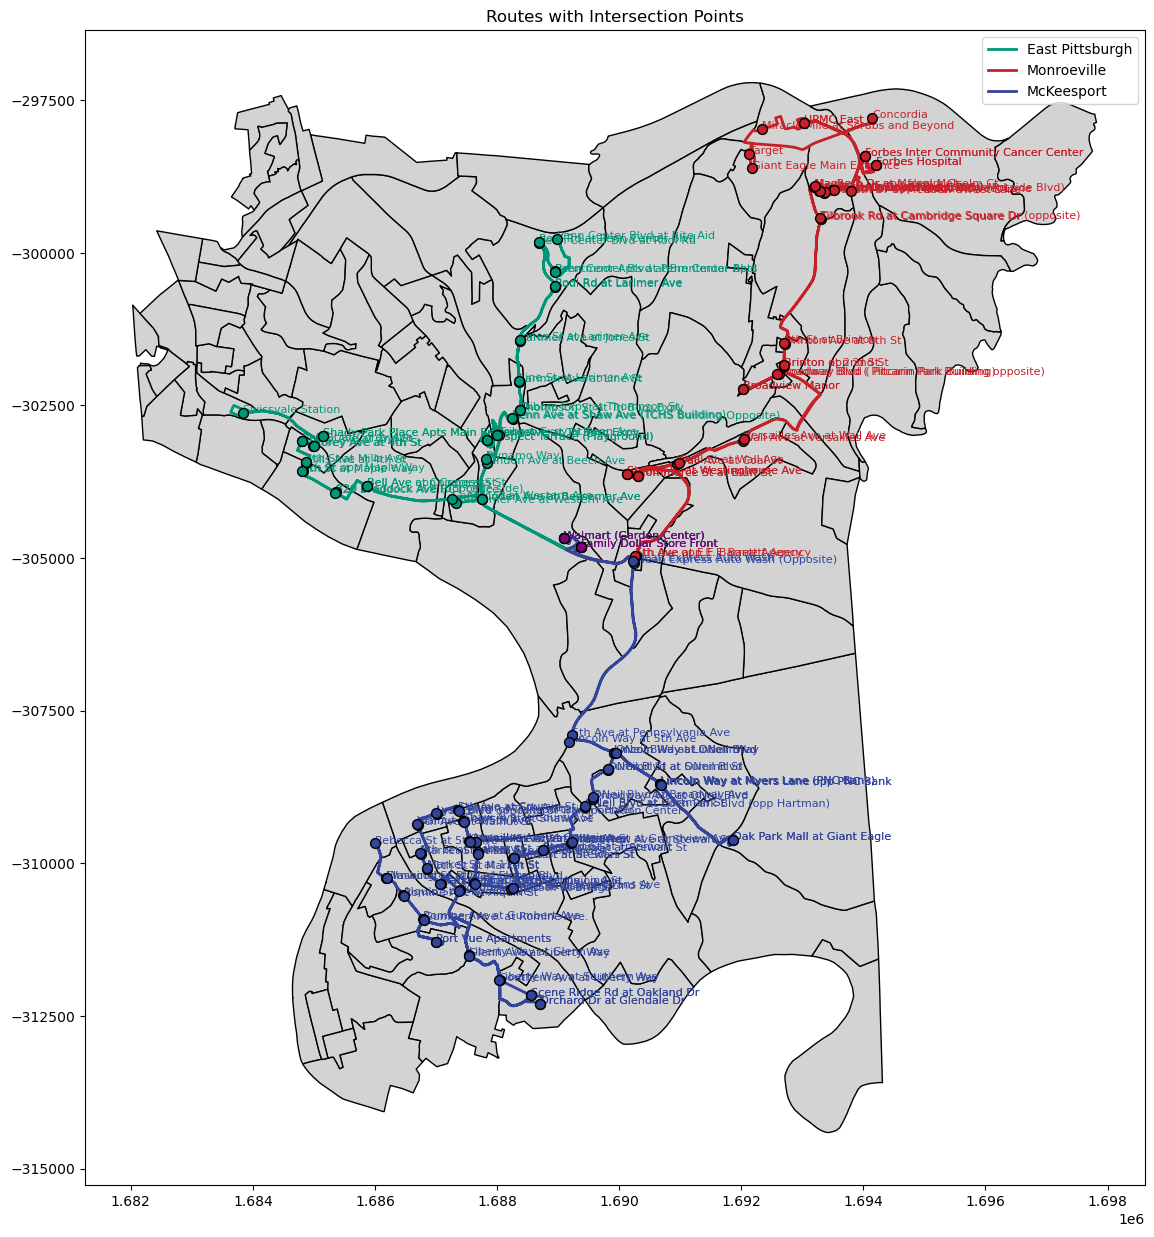

In [ ]:
route0 = {stop_info['Description']: stop_info for stop_info in routes_info[0].get("Stops", [])}
route1 = {stop_info['Description']: stop_info for stop_info in routes_info[1].get("Stops", [])}
route2 = {stop_info['Description']: stop_info for stop_info in routes_info[2].get("Stops", [])}
# Find the intersection of the three routes
intersection = set(route0.keys()).intersection(set(route1.keys())).intersection(set(route2.keys()))
print(f"Intersection of the three routes: {intersection}")

# Plot the routes with the intersection points
fig, ax = plt.subplots(figsize=(15, 15))
# Plot block groups as the base layer.
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
for route in routes_info:
    route_name = route.get("Description", f"Route {route.get('RouteID', 'Unknown')}")
    encoded_poly = route.get("EncodedPolyline")
    line_color = route.get("MapLineColor", "#000000")
    stops = route.get("Stops", [])
    
    # Decode and project the route polyline.
    if encoded_poly:
        try:
            coords = polyline.decode(encoded_poly)  # returns (lat, lng) pairs
            coords_swapped = [(lng, lat) for lat, lng in coords]
            route_line = LineString(coords_swapped)
            projected_line = project_geometry(route_line)
            ax.plot(*projected_line.xy, color=line_color, linewidth=2, label=route_name)
        except Exception as e:
            print(f"Error decoding polyline for route '{route_name}': {e}")

    # Plot each stop.
    for stop in stops:
        lat = stop.get("Latitude")
        lng = stop.get("Longitude")
        desc = stop.get("Description", "")
        pt = Point(lng, lat)
        projected_pt = project_geometry(pt)
        ax.scatter(projected_pt.x, projected_pt.y, color=line_color, s=50, edgecolor='k', zorder=5)
        ax.text(projected_pt.x, projected_pt.y, desc, fontsize=8, color=line_color)

# Plot the intersection points
for stop in intersection:
    stop_info = route0.get(stop) or route1.get(stop) or route2.get(stop)
    lat = stop_info.get("Latitude")
    lng = stop_info.get("Longitude")
    pt = Point(lng, lat)
    projected_pt = project_geometry(pt)
    ax.scatter(projected_pt.x, projected_pt.y, color='purple', s=50, edgecolor='k', zorder=5)
    ax.text(projected_pt.x, projected_pt.y, stop, fontsize=8, color='purple')
plt.title("Routes with Intersection Points")
plt.legend()
plt.show()
